# Importing Libraries

In [94]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Test set Image Processing

In [95]:
predict_set = tf.keras.utils.image_dataset_from_directory(
    'predict/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 26 files belonging to 4 classes.


# Loading Model

In [96]:
cnn = tf.keras.models.load_model('trained_model_epoch100.h5')

#Visualising and Performing Prediction on Single image

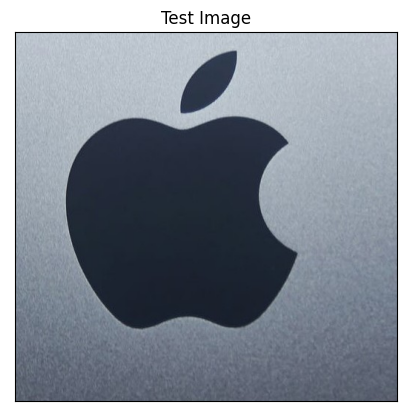

In [97]:
#Test Image Visualization
import cv2
image_path = 'C:/Users/DELL/Desktop/Bootcamp/ML1-Bootcamp/WebScrap_CNN/FRUIT CNN/predict/apple/apple.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [98]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [99]:
print(predictions)

[[9.7188008e-01 2.2939848e-02 4.7902507e-03 3.8979849e-04]]


In [100]:
# test_set.class_names

In [101]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


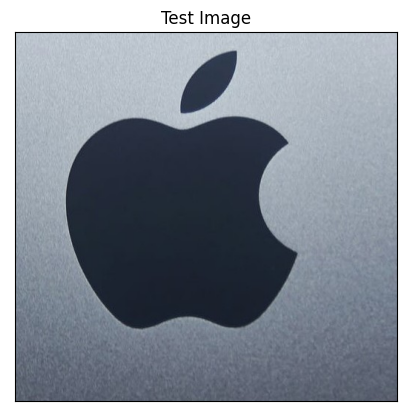

In [102]:
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [103]:
#Single image Prediction
print("It's a {}".format(predict_set.class_names[result_index]))

It's a apple


In [107]:
# Test dataset evaluation
test_set = tf.keras.utils.image_dataset_from_directory(
    'test/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 397 files belonging to 4 classes.


In [108]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5244 - loss: 2.6835
Test accuracy: 0.5415617227554321


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
              precision    recall  f1-score   support

           0       0.60      0.81      0.69        89
           1       0.50      0.66      0.57       106
           2       0.37      0.28      0.32       105
           3       0.73      0.45      0.56        97

    accuracy                           0.54       397
   macro avg       0.55      0.55      0.53       397
weighted avg       0.55      0.54      0.53       397



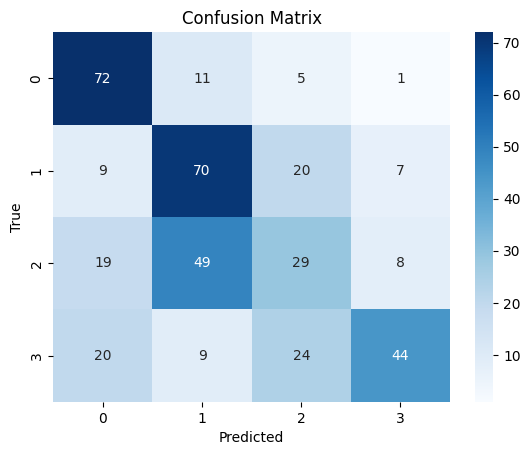

In [110]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = []
y_true = []

for images, labels in test_set:
    predictions = cnn.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Found 919 files belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Actual: , Predicted: Apple


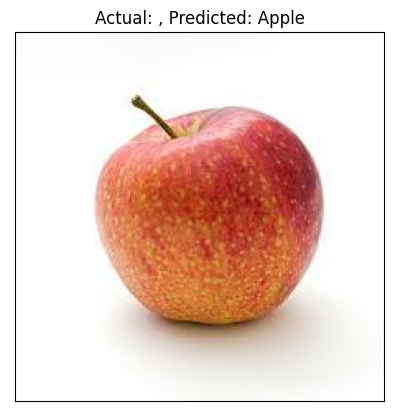

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Actual: , Predicted: Apple


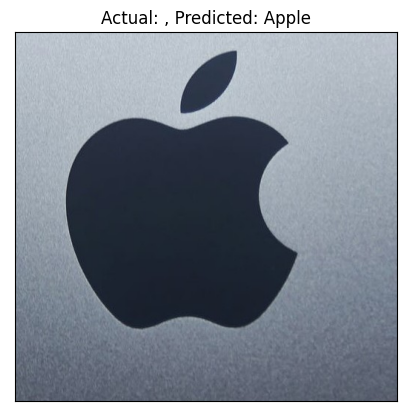

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Actual: , Predicted: Apple


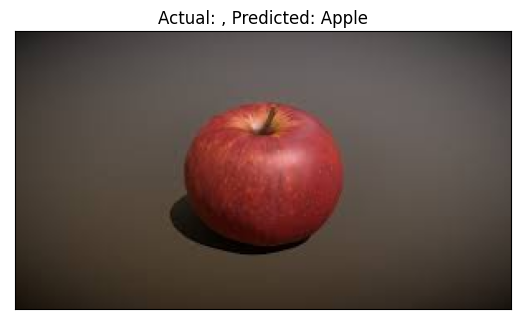

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Actual: , Predicted: Banana


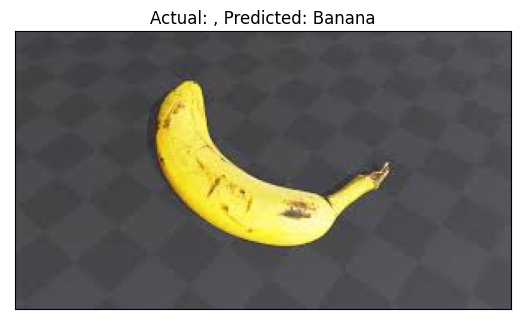

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Actual: , Predicted: Banana


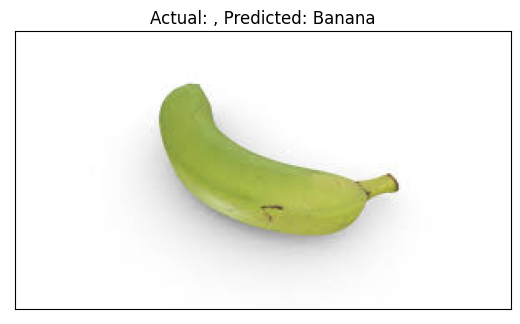

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Actual: , Predicted: mango


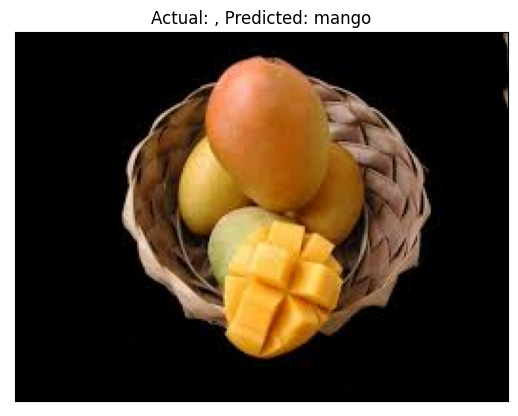

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Actual: , Predicted: Banana


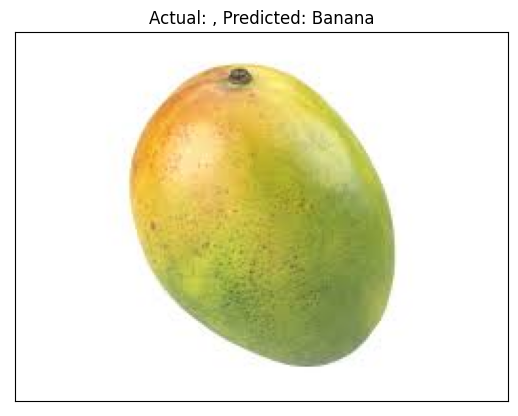

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Actual: , Predicted: Banana


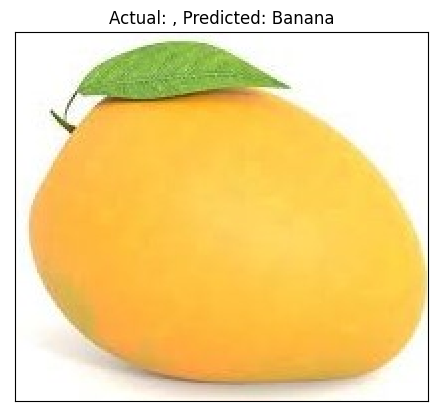

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Actual: , Predicted: orange


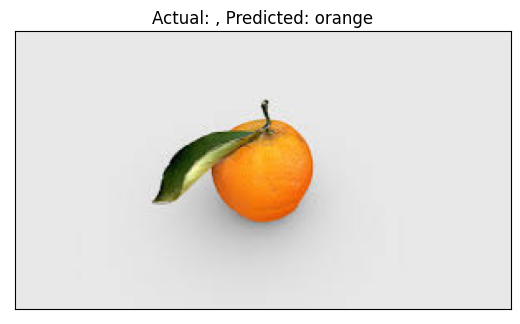

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Actual: , Predicted: Apple


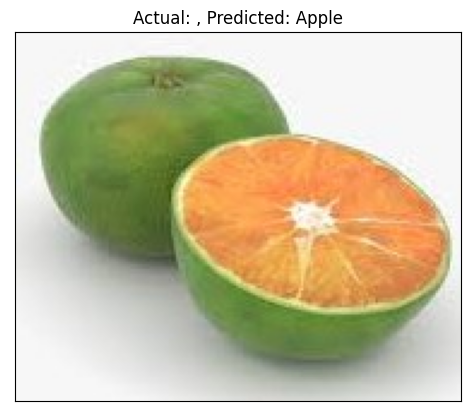

In [115]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Load the trained model
cnn = tf.keras.models.load_model('trained_model_epoch100.h5')

# Define the path to the folder containing images for prediction
image_folder_path = 'Archive/'

# Load the class names from the training set to ensure correct labels
train_set = tf.keras.utils.image_dataset_from_directory(
    'train/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_names = train_set.class_names

# Iterate through each image in the folder
for subdir, dirs, files in os.walk(image_folder_path):
    for file in files:
        image_path = os.path.join(subdir, file)
        # Load and preprocess the image
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
        input_arr = tf.keras.preprocessing.image.img_to_array(image)
        input_arr = np.array([input_arr])  # Convert single image to a batch.

        # Make prediction
        predictions = cnn.predict(input_arr)
        result_index = np.argmax(predictions)  # Return index of max element

        # Extract the actual label from the folder structure
        actual_label = os.path.basename(subdir)

        # Print the prediction result
        print(f"Actual: {actual_label}, Predicted: {class_names[result_index]}")

        # Visualize the image and the prediction
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB
        plt.imshow(img)
        plt.title(f"Actual: {actual_label}, Predicted: {class_names[result_index]}")
        plt.xticks([])
        plt.yticks([])
        plt.show()
